# Generate Sparse Signal

This notebook generates a synthetic sparse state vector over time and simulates noisy linear measurements. The output will be used in later notebooks for state estimation using the Kalman filter.

## 1. Setup and Imports

Create necessary folders and import the required libraries for simulation and plotting.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Create folders to store results if they don't exist
os.makedirs("data", exist_ok=True)
os.makedirs("plots", exist_ok=True)

## 2. Define Simulation Parameters

Set up the time horizon, state and observation vector sizes, and the level of sparsity.


In [8]:
# Simulation configuration
n_timesteps = 50
n_states = 20
sparsity = 5
n_measurements = 10
np.random.seed(0)


## 3. Generate Sparse State Vectors

Create a sequence of state vectors where only a small subset of elements are active. These evolve with Gaussian noise in a random walk style.


In [9]:
# Initialize sparse state vector
x_true = np.zeros((n_timesteps, n_states))
non_zero_indices = np.random.choice(n_states, sparsity, replace=False)

# Sparse random walk dynamics
for t in range(1, n_timesteps):
    x_true[t] = x_true[t-1]
    x_true[t, non_zero_indices] += np.random.randn(sparsity) * 0.5


## 4. Generate Observations

Create the measurement matrix `H` and simulate observations `y` by adding Gaussian noise.


In [10]:
# Generate random measurement matrix and observations
H = np.random.randn(n_measurements, n_states)
R = 0.1 * np.eye(n_measurements)  # measurement noise covariance
noise = np.random.multivariate_normal(np.zeros(n_measurements), R, n_timesteps)
y = np.dot(x_true, H.T) + noise


## 5. Save Data

Save generated data to `.npy` files so they can be used in the next notebooks.


In [11]:
# Save arrays
np.save("data/x_true.npy", x_true)
np.save("data/y.npy", y)
np.save("data/H.npy", H)


## 6. Plot True Sparse States

Visualize the evolution of the non-zero state variables over time.


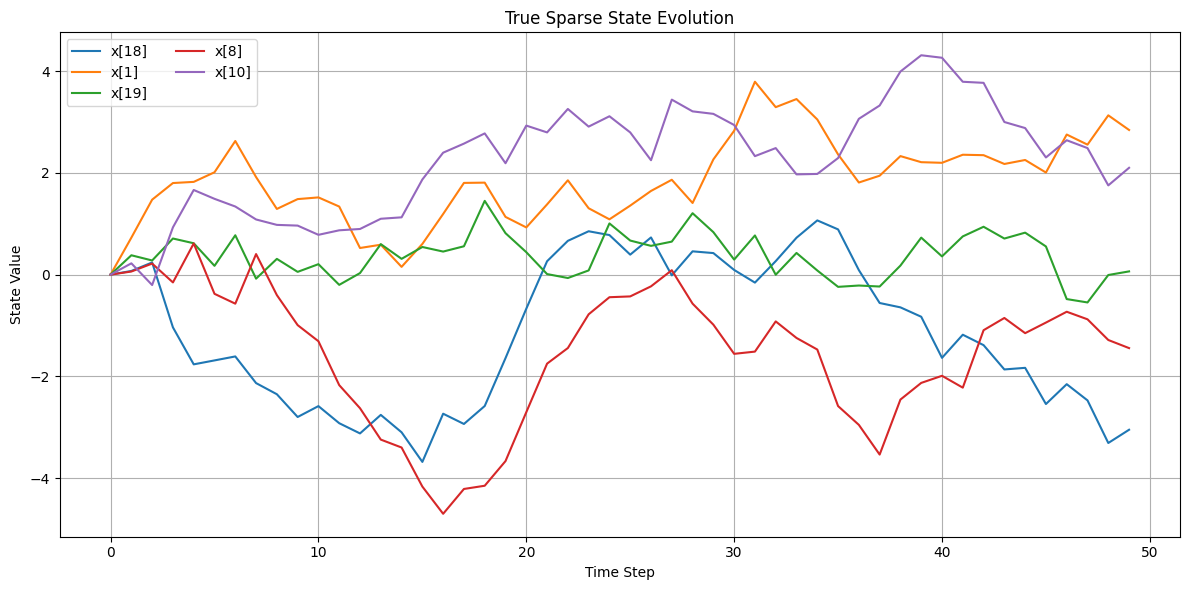

In [12]:
# Plot non-zero states
plt.figure(figsize=(12, 6))
for i in non_zero_indices:
    plt.plot(x_true[:, i], label=f"x[{i}]")
plt.title("True Sparse State Evolution")
plt.xlabel("Time Step")
plt.ylabel("State Value")
plt.legend(ncol=2)
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/true_sparse_states.png")
plt.show()
